In [558]:
%matplotlib inline

import numpy as np
import random
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [559]:
# Given the equation: y_i = B * x_i + A + e_i

# Alpha is the intercept, beta is the weight. 
# Assuming we know alpha and beta for x_i we can calculate back y_i.
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [560]:
def error(alpha, beta, x_i, y_i):
    """The error from predicting beta * x_i + alpha when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

In [561]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [562]:
def dot(v, w):
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def vector_subtract(v, w):
    return [v_i - w_i 
            for v_i, w_i in zip(v, w)]

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def distance(v, w):
    return math.sqrt()

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar 
            for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    return 0 # If no covariance, correlation is 0.

In [563]:
def least_squares_fit(x, y):
    """Given training values for x and y, find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [564]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
# alpha = 22.95 and beta = 0.903, which means a user with n friends will spend (22.95 + n * 0.903 minutes) minutes on the site each day.
# Compare the value obtained with the one through stochastic gradient descent.
alpha, beta

(22.94755241346903, 0.903865945605865)

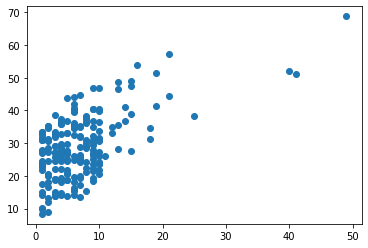

In [565]:
plt.scatter(num_friends_good, daily_minutes_good)

In [566]:
def total_sum_of_squares(y):
    """The total squared variation of y_i's from their mean."""
    return sum(v ** 2 for v in de_mean(y))

In [567]:
def r_squared(alpha, beta, x, y):
    """The fraction of variation in y captured by the model, which equals 1 - the fraction of variation 
    in y not captured by the model."""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [568]:
r_squared(alpha, beta, num_friends_good, daily_minutes_good) # 0.329

0.3291078377836305

In [569]:
y_predicted = [predict(alpha, beta, x_i) for x_i in num_friends_good]
print(f'R^2: {r2_score(daily_minutes_good, y_predicted):.2f}')
print(f'MSE: {mean_squared_error(daily_minutes_good, y_predicted)}')

R^2: 0.33
MSE: 65.00797683198608


## Using gradient descent

In [570]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

In [571]:
def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative.
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative.

In [572]:
# From vectors topic.

def vector_subtract(v, w):
    return [v_i - w_i 
            for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

In [573]:
import random

random.seed(0)

def in_random_order(data):
    """Generator that returns the elements of data in random order."""
    indices = [i for i, _ in enumerate(data)] # Create a list of indexes.
    random.shuffle(indices)
    for i in indices:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    # ! Without list(), this will turn out wrong.
    data = list(zip(x, y))
    theta = theta_0 # Initial guess.
    alpha = alpha_0 # Initial step size.
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvements = 0
    
    # If we ever go 100 iterations with no improvements, stop.
    while iterations_with_no_improvements < 100:
        value = sum(target_fn(x_i, y_i, theta) 
                    for x_i, y_i in data)
        
        if value < min_value:
            # If we have found a minimum, remember it and go back to the original step size.
            min_theta, min_value = theta, value
            iterations_with_no_improvements = 0
            alpha = alpha_0
        else:
            # Otherwise we are not improving, so try shrinking the step size.
            iterations_with_no_improvements += 1
            alpha *= 0.9
        
        # And take the gradient step for each of the data points.
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [574]:
random.seed(0)

theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error, 
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good,
                                  theta,
                                  0.000_1)

# We get alpha = 22.93, and beta = 0.905.
alpha, beta

(22.93746417548679, 0.9043371597664965)

In [575]:
num_friends_good[:10], daily_minutes_good[:10]

([49, 41, 40, 25, 21, 21, 19, 19, 18, 18],
 [68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76])

## With scikit-learn SGDRegressor

In [576]:
# Wrong, should use SGDRegressor
# clf = SGDClassifier(loss='squared_loss', tol=1e-3, max_iter=1000, random_state=42, shuffle=True)
clf = SGDRegressor(max_iter=1_000, random_state=42, n_iter_no_change=100)
clf

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=100, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [577]:
X = np.array(num_friends_good).reshape(-1, 1)
y = np.array(daily_minutes_good, dtype=np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.9, 
                                                    random_state=0, 
                                                    shuffle=True)

In [578]:
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(f'R^2: {r2_score(y_test, y_predicted):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_predicted)}')

R^2: 0.35
MSE: 80.99506765549015


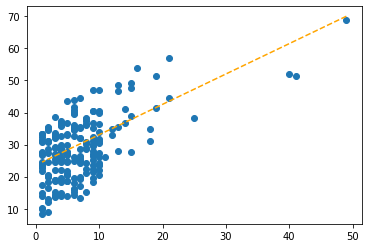

In [579]:
plt.scatter(X, y)
plt.plot(X, clf.predict(X), linestyle='--', color='orange')

In [580]:
# X_train.shape, y_train.shape, X.shape, y.shape

In [581]:
clf.coef_, clf.intercept_, clf.n_iter_ # The value will match if we fit it against X and y.

(array([0.94793462]), array([23.58613006]), 360)

## With scikit-learn LinearRegression

In [582]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
clf.coef_, clf.intercept_

(array([0.86182543]), 23.50742349516432)

In [583]:
clf.score(X_test, y_test)

0.36545413406119454

In [584]:
r2_score(y_test, y_predict)
print(f'R^2: {r2_score(y_test, y_predict):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_predict)}')

R^2: 0.37
MSE: 79.44070951552987


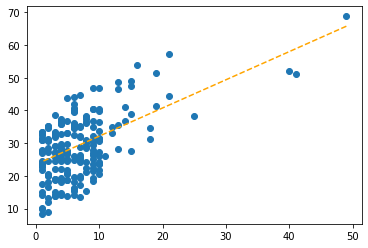

In [585]:
plt.scatter(X, y)
plt.plot(X, clf.predict(X), linestyle='--', color='orange')

In [586]:
## Least-squares fitting with scipy

In [587]:
import scipy.optimize as optimization

In [588]:
X = num_friends_good
y = daily_minutes_good
x0 = np.array([0.0, 0.0]) # Initial guess.
sigma = np.ones(len(X)) # Data errors.

In [589]:
def line_fn (x, a, b):
    return predict(a, b, x)

In [590]:
# Attempt to find the best fit for the given function.
constants, _ = optimization.curve_fit(line_fn, X, y, x0, sigma)
constants # This produces alpha (intercept) and beta (weights).

array([22.94755243,  0.90386594])

In [591]:
# Attempt to find minimize the error.

In [592]:
# The objective function that should be minimized.
# def error(alpha, beta, x_i, y_i):
#     """The error from predicting beta * x_i + alpha when the actual value is y_i"""
#     return y_i - predict(alpha, beta, x_i)
def objective_fn(params, X, y):
    return y - (X @ params)

In [594]:
# Provide data as design matrix: straight line with a=0 and b=1 plus some noise (bias term).
xdata = np.array([X, np.ones(len(X))]).T
ydata = np.array(y)
constants, _ = optimization.leastsq(objective_fn, x0, args=(xdata, ydata))
constants # Beta, alpha.

array([ 0.90386594, 22.94755243])

In [ ]:
beta, alpha = constants
y_predict = [line_fn(x_i, alpha, beta) for x_i in X]
r2_score(y, y_predict)